# **Recognising COVID Rapid Test Results**

## **Key Assumptions:**
* Our code works for one type of COVID self test
* The COVID test results will display in a pink or red hue

## **Wishlist**
* Test different ensemble classifier
* Test different images
* Add code to automatically warp the image so that the image appears head on
* Host code in user-friendly platform; store classifier so that algorithm doesn't need to be re-run each time
* Try to connect to Hertie's super server

In [1]:
"""Table of Contents

1. Repository Structure
2. Import Packages
3. Train Algorithm
4. Create Ensemble Model
5. Load Image
6. Recognise COVID Test Results
7. Recognise Handwritten Serial Number
"""

'Table of Contents\n\n1. Document the Project\n2. Import Packages\n3. Train Algorithm\n4. Create Ensemble Model\n5. Load Image\n6. Predict COVID Test Results\n7. Predict handwritten serial Number\n'

In [2]:
"""1. Repository Structure

DSA--Final-Project/
│
├── project/ # project source code
├── docs/ # folder that contains further documentation (if any) / we can add test-images here 
├── README # brief summary of the project and its purpose
├── LICENSE 
├── examples.py # ? 
"""

'1. Repository Contents\n\nDSA--Final-Project/\n│\n├── project/ # project source code\n├── docs/ # folder that contains further documentation (if any) / we can add test-images here \n├── README # brief summary of the project and its purpose\n├── LICENSE \n├── examples.py # ? \n'

In [3]:
"""2. Import Dependencies

Python ≥3.5 and Scikit-Learn ≥0.20 are required for this project. Additional packages are imported and a seed is set to make this
notebook's output stable across runs.
"""

"2. Import Dependencies\n\nPython ≥3.5 and Scikit-Learn ≥0.20 are required for this project. Additional packages are imported and a seed is set to make this\nnotebook's output stable across runs.\n"

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# import necessary dependencies
import os
import numpy as np
import cv2
import imutils
from imutils import contours
from google.colab.patches import cv2_imshow

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# set seed to make this notebook's output stable across runs
np.random.seed(42)

In [5]:
"""3. Train Algorithm

The MNIST dataset containing images of handwritten digits is imported and then randomly split into a training set and a testing set. 
Then, the Multi-layer Perception classifier, the K-Nearest Neighbor classifier, and the Random Forest classifier are imported and trained
individually before predictions are made and an accuracy score for each of them is calculated and printed.
"""

'3. Train Algorithm\n\nThe MNIST dataset containing images of handwritten digits is imported and then randomly split into a training set and a testing set. \nThen, the Multi-layer Perception classifier, the K-Nearest Neighbor classifier, and the Random Forest classifier are imported and trained\nindividually before predictions are made and an accuracy score for each of them is calculated and printed.\n'

In [6]:
# import dataset 
from sklearn.datasets import fetch_openml

# import 28x28 images of handwritten digits from MNIST database
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.target = mnist.target.astype(np.uint8) # as uint8 data type

In [7]:
# randomly split dataset into training set and testing set 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size = 10000, random_state = 42)

In [8]:
# import classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# train Multi-layer Perception classifier
mlp_clr = MLPClassifier(random_state = 42)
mlp_clr.fit(x_train, y_train)

# train K Nearest Neighbor classifier
knn_clr = KNeighborsClassifier(n_neighbors = 3)
knn_clr.fit(x_train, y_train)

# train Random Forest classifier
rf_clr = RandomForestClassifier(random_state = 42, n_estimators = 100)
rf_clr.fit(x_train, y_train)

# make predictions with individual classifiers
y_pred_mlp = mlp_clr.predict(x_test)
y_pred_knn = knn_clr.predict(x_test)
y_pred_rf = rf_clr.predict(x_test)

In [9]:
# calculate accuracy scores for various classifiers
from sklearn.metrics import accuracy_score

print("ACCURACY SCORES")
print("---------------")
print("MLP classifier: ", accuracy_score(y_test, y_pred_mlp))
print("KNN classifier: ", accuracy_score(y_test, y_pred_knn))
print("RF classifier:  ", accuracy_score(y_test, y_pred_rf))

ACCURACY SCORES
---------------
MLP classifier:  0.9625
KNN classifier:  0.9711
RF classifier:   0.9674


In [10]:
"""4. Create Ensemble Model

After an ensemble classifier is imported, the three classifiers trained above are combined in order to create a more accurate ensemble model. 
This is then used to make a prediction and once again calculate and print accuracy scores.
"""

'4. Create Ensemble Model\n\nAfter an ensemble classifier is imported, the three classifiers trained above are combined in order to create a more accurate ensemble model. \nThis is then used to make a prediction and once again calculate and print accuracy scores.\n'

In [11]:
# import ensemble classifier
from sklearn.ensemble import VotingClassifier

In [60]:
# combine classifiers to create a more accurate ensemble classifier
vot_clr = VotingClassifier(estimators = [('mlp', mlp_clr), ('knn', knn_clr),('rf', rf_clr)],
                           voting = 'soft') # voting classifier predicts based on the argmax of the sums of classifiers' predicted probabilities 
vot_clr.fit(x_train, y_train)

VotingClassifier(estimators=[('mlp', MLPClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [13]:
# make prediction with ensemble classifier
y_pred_vot = vot_clr.predict(x_test)

In [14]:
print("ACCURACY SCORES")
print("---------------")
print("MLP classifier: ", accuracy_score(y_test, y_pred_mlp))
print("KNN classifier: ", accuracy_score(y_test, y_pred_knn))
print("RF classifier:  ", accuracy_score(y_test, y_pred_rf))
print("*Voting classifier: ", accuracy_score(y_test, y_pred_vot))

ACCURACY SCORES
---------------
MLP classifier:  0.9625
KNN classifier:  0.9711
RF classifier:   0.9674
*Voting classifier:  0.9771


In [15]:
"""5. Load Image

An image containing an antigen rapid test is loaded from the repository. It is then resized and displayed.
"""

'5. Load Image\n\nAn image containing an antigen rapid test is loaded from the repository. It is then resized and displayed.\n'

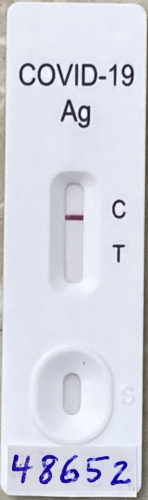

In [16]:
# load image 
orig = cv2.imread("/content/test-image-1.png")

# resize image to standardize 
new_h = 500 #
h, w = orig.shape[:2]
r =  new_h / float(h)
dim = (int(w * r), new_h)
img = resized = cv2.resize(orig, dim, interpolation = cv2.INTER_AREA)

# display image 
cv2_imshow(img)

In [17]:
"""6. Recognise COVID Test Results

First, the BGR image is converted to HSV colour space. The distinct pink/red/purple hue present in the control- and test-lines of COVID 
antigen tests is used to create a mask. The mask highlights potential control- and test-lines present in the image (if any. The potential 
control- and test-lines are then converted to grayscale, blurred, and thresholded to further refine the computer's vision. The remaining 
contours are located, counted, and drawn before the test is classified as positive, negative, or inconclusive depending on the number of 
contours present.
"""

'6. Predict COVID Test Results\n\nFirst, the BGR image is converted to HSV colour space and HSV purple is located. A mask is created, highlighting the test- and\ncontrollines in the test (if any) which is then refined by performing bitwise, converting to grayscale, blurring, and thresholding the\nimage. The resulting contours are located, counted, and drawn before the test is classified as positive, negative, or inconclusive\ndepending on the number of contours found.\n'

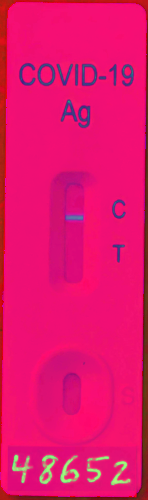

In [18]:
# convert the BGR image to HSV colour space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# check it 
cv2_imshow(hsv)

In [19]:
# set the lower and upper bounds for the red hue
lower_red = np.array([150,60,0])
upper_red = np.array([179,255,255]) 

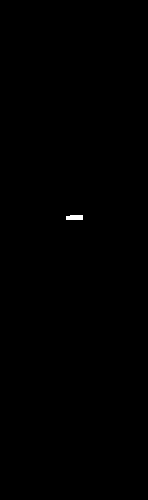

In [22]:
# create a mask for red colour using inRange function
mask = cv2.inRange(hsv, lower_red, upper_red)

# check it 
cv2_imshow(mask)

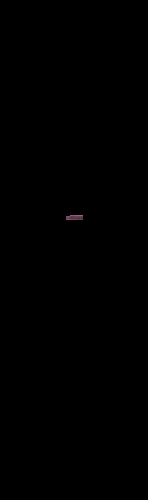

In [23]:
# perform bitwise and on the original image arrays using the mask
res = cv2.bitwise_and(img, img, mask = mask)

# check it
cv2_imshow(res)

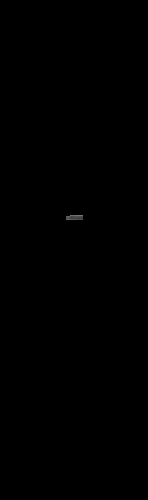

In [24]:
# gray
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# check it
cv2_imshow(gray)

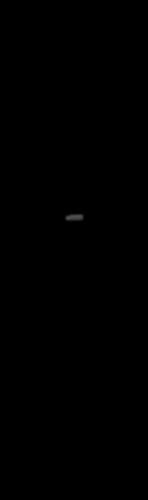

In [25]:
# blur 
blurred = cv2.GaussianBlur(gray, (5, 5), 0) # Gaussian blurring with a 5×5 kernel to reduce high-frequency noise

# check it
cv2_imshow(blurred)

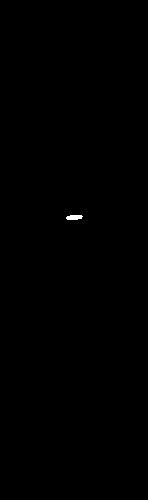

In [26]:
# thresh
ret, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)

# check it 
cv2_imshow(thresh)

In [27]:
# find contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)

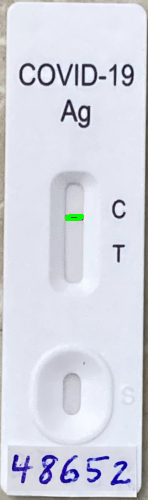

In [28]:
# draw contours
cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)

# check it
cv2_imshow(img)

In [59]:
# drumroll please...
if len(cnts) == 2:
  print('The number of lines found in the COVID test is', len(cnts) )
  print('The COVID test is positive')
elif len(cnts) == 1:
  print('The number of lines found in the COVID test is', len(cnts) )
  print('The COVID test is negative')
else: 
  print('The number of lines found in the COVID test is', len(cnts) )
  print('The COVID test is inconclusive')

The number of lines found in the COVID test is 5
The COVID test is inconclusive


In [30]:
"""7. Recognise Handwritten Serial Numbers

An image of black pixels which is the same size as the original, resized image is created. Since the serial number ('region of interest')
is located towards the bottom of the COVID test, a mask is created to highlight the region of interest. The original, resized image is 
then grayed, blurred, and thresholded before the mask is applied. The remaining contours (ideally the digits) are sorted from left-to-right 
and a list is initialized to which the digit arrays are appended once the rectangle points for each digit contour have been extracted, padding 
around the digit array has been added, and the digit contour arrays have been resized. Afterwards, the list of digits is converted to np.array 
and reshaped. Finally, the ensemble classifier predicts the value of each digit contour in the list. 
"""

'7. Predict handwritten serial Number\n\nThe original resized image is converted into an image of blach pixels of the same size before the mask is created, highlighting the\nregion of interest. The original resized image is processed by converting to grayscale, blurring, and thresholding it before it is masked.\nThe remaining contours are sorted from left to right and a list is initialize to which the digit arrays are appended after bounding\nrectangle points for each digit contour are extracted, the digit is thresholded, padding around the digit array is added, and the desired\nsize of the output image is specified. The list of digits is converted to np.array and reshaped. Then, a pediction for the elements of the\nlist is made.\n'

In [31]:
# reset image 
img = resized

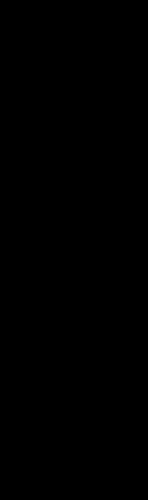

In [32]:
# construct an image of black pixels of the same size.
black = np.zeros((img.shape[0], img.shape[1], 3), np.uint8) #black in RGB

# check it 
cv2_imshow(black)

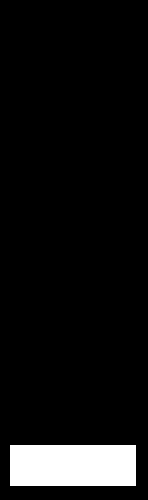

In [33]:
# form the mask and highlight the ROI:
black = cv2.rectangle(black,(10, 445),(135, 485),(255, 255, 255), -1) # the dimension of the ROI
gray = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY) # convert to gray
ret, b_mask = cv2.threshold(gray, 0, 255, 0) # convert to binary

# check it 
cv2_imshow(b_mask)

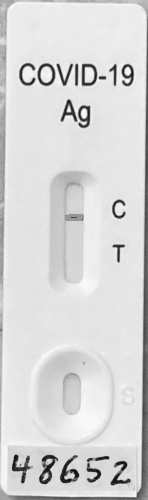

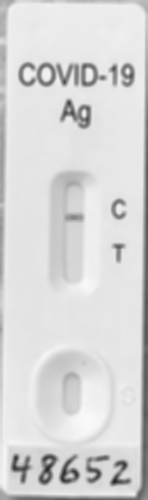

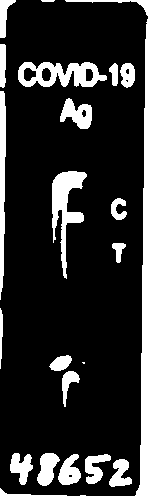

In [34]:
# process original image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray
cv2_imshow(gray)

blurred = cv2.GaussianBlur(gray, (5, 5), cv2.BORDER_DEFAULT) # Gaussian blurring with a 5×5 kernel to reduce high-frequency noise
cv2_imshow(blurred)

ret, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV) # thresh
cv2_imshow(thresh)

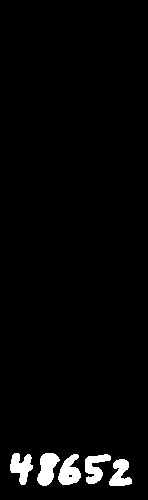

In [35]:
# Mask the image above with your original image
masked = cv2.bitwise_and(thresh, thresh, mask = b_mask)

# check it
cv2_imshow(masked)

In [36]:
# find contours
cnts = cv2.findContours(masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) #or try cv2.CHAIN_APPROX_SIMPLE
cnts = imutils.grab_contours(cnts)

In [37]:
# sort the contours from left-to-right
(cnts, _) = contours.sort_contours(cnts, method = "left-to-right")

In [38]:
# initialize list of digit arrays
digits = []
for c in cnts:
   x,y,w,h = cv2.boundingRect(c) # extract bounding rectangle points for each digit contour
   cv2.rectangle(img, # image
                 (x, y), # start point
                 (x+w, y+h), # end point 
                 (0, 255, 0), # color (green)
                 2) # thickness
   digit = thresh[y:y+h, x:x+w] # threshold the digit
   padded_digit = np.pad(array = digit, 
                         pad_width = ((10,10), (10,10)), # add padding around digit array
                         mode = "constant", 
                         constant_values = 0)
   digit = cv2.resize(src = padded_digit, 
                      dsize = (28,28)) # desired size of the output image, given as tuple
   digits.append(digit) # creates a list of digit arrays 

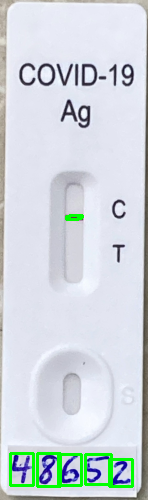

In [39]:
# display contours 
cv2_imshow(img)

In [40]:
# display first digit to make sure order is correct
cv2_imshow(digits[0])
digits[1].shape

(28, 28)

In [41]:
digits = np.array(digits) # convert list of digits to np.array

In [42]:
digits = digits.reshape(digits.shape[0], # length remains equal to the number of digits
                        digits.shape[1]*digits.shape[2]) # the new size is the heighth x width of the digit images (28 x 28 = 784)

In [43]:
y_pred = vot_clr.predict(digits)

In [61]:
print("The serial number for this COVID test is:", y_pred)

The serial number for this COVID test is: [4 8 6 8 2]


## Sources

*   https://stackoverflow.com/questions/62247234/wrong-contours-and-wrong-output-of-handwritten-digit-recognition-ai-model
*   https://python.hotexamples.com/examples/imutils.contours/-/sort_contours/python-sort_contours-function-examples.html
*   https://github.com/PyImageSearch/imutils/blob/master/demos/sorting_contours.py  
* https://medium.com/featurepreneur/colour-filtering-and-colour-pop-effects-using-opencv-python-3ce7d4576140 
* https://stackoverflow.com/questions/42004652/how-can-i-find-contours-inside-roi-using-opencv-and-python
* https://stackoverflow.com/questions/44333605/what-does-bitwise-and-operator-exactly-do-in-opencv
* https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a
* https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
* https://stackoverflow.com/questions/30331944/finding-red-color-in-image-using-python-opencv
* https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html
* https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
* https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html 